In [4]:
import pandas as pd
import seaborn as sns

In [5]:
dados = pd.read_csv('../data/flights_with_noise.csv')

In [6]:
dados

flight_id airline aircraft_type      schengen origin  arrival_time  \
0              5      FV    Boeing 787      schengen    PHP     15.644679   
1             12      FV    Boeing 737      schengen    WMW     15.132114   
2             20      FV    Boeing 737  non-schengen    KXL      8.775956   
3             27      WY  Embraer E175      schengen    WMW     15.228047   
4             18      FV    Boeing 737      schengen    ZME     10.566427   
...          ...     ...           ...           ...    ...           ...   
71170         14      WY   Airbus A320      schengen    KXL      8.827826   
71171         11      FV   Airbus A320      schengen    CBT     17.570400   
71172         10      FV    Boeing 787      schengen    PHP      7.546348   
71173         26      FV   Airbus A320      schengen    ZME      5.894353   
71174          3      FV    Boeing 737      schengen    CBT      8.022943   

       departure_time  day  year  is_holiday      delay  
0           17.644679    0  2010       False  54.592538  
1           18.132114    0  2010       False  68.984155  
2           11.775956    0  2010       False  48.373294  
3           20.228047    0  2010       False  21.507366  
4           13.566427    0  2010       False  29.483304  
...               ...  ...   ...         ...        ...  
71170       11.827826  364  2022       False  74.998723  
71171       20.570400  364  2022       False  72.231923  
71172       10.546348  364  2022       False  34.463932  
71173        8.894353  364  2022       False  56.196211  
71174       10.022943  364  2022       False  20.762219  

[71175 rows x 11 columns]

In [7]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71175 entries, 0 to 71174
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   flight_id       71175 non-null  int64  
 1   airline         71175 non-null  object 
 2   aircraft_type   71175 non-null  object 
 3   schengen        71175 non-null  object 
 4   origin          71175 non-null  object 
 5   arrival_time    71175 non-null  float64
 6   departure_time  71175 non-null  float64
 7   day             71175 non-null  int64  
 8   year            71175 non-null  int64  
 9   is_holiday      71175 non-null  bool   
 10  delay           71175 non-null  float64
dtypes: bool(1), float64(3), int64(3), object(4)
memory usage: 5.5+ MB


In [8]:
dados['delay']

0        54.592538
1        68.984155
2        48.373294
3        21.507366
4        29.483304
           ...    
71170    74.998723
71171    72.231923
71172    34.463932
71173    56.196211
71174    20.762219
Name: delay, Length: 71175, dtype: float64

In [9]:
from datetime import datetime, timedelta

In [10]:
def convert_day_to_date(day, year):
    base_date = datetime(year=year, month=1, day=1)
    target_date = base_date + timedelta(days=day)
    return target_date.strftime('%Y-%m-%d')  # Format the date as desired

# Convert 'day' column to regular dates
dados['date'] = dados.apply(lambda row: convert_day_to_date(row['day'], row['year']), axis=1)

In [11]:
dados

flight_id airline aircraft_type      schengen origin  arrival_time  \
0              5      FV    Boeing 787      schengen    PHP     15.644679   
1             12      FV    Boeing 737      schengen    WMW     15.132114   
2             20      FV    Boeing 737  non-schengen    KXL      8.775956   
3             27      WY  Embraer E175      schengen    WMW     15.228047   
4             18      FV    Boeing 737      schengen    ZME     10.566427   
...          ...     ...           ...           ...    ...           ...   
71170         14      WY   Airbus A320      schengen    KXL      8.827826   
71171         11      FV   Airbus A320      schengen    CBT     17.570400   
71172         10      FV    Boeing 787      schengen    PHP      7.546348   
71173         26      FV   Airbus A320      schengen    ZME      5.894353   
71174          3      FV    Boeing 737      schengen    CBT      8.022943   

       departure_time  day  year  is_holiday      delay        date  
0           17.644679    0  2010       False  54.592538  2010-01-01  
1           18.132114    0  2010       False  68.984155  2010-01-01  
2           11.775956    0  2010       False  48.373294  2010-01-01  
3           20.228047    0  2010       False  21.507366  2010-01-01  
4           13.566427    0  2010       False  29.483304  2010-01-01  
...               ...  ...   ...         ...        ...         ...  
71170       11.827826  364  2022       False  74.998723  2022-12-31  
71171       20.570400  364  2022       False  72.231923  2022-12-31  
71172       10.546348  364  2022       False  34.463932  2022-12-31  
71173        8.894353  364  2022       False  56.196211  2022-12-31  
71174       10.022943  364  2022       False  20.762219  2022-12-31  

[71175 rows x 12 columns]

In [12]:
import plotly.express as px

In [13]:
px.line(dados[dados['year']==2018], x = 'date', y = 'delay', color = 'airline')

In [14]:
px.histogram(dados, x = 'delay')

In [15]:
px.histogram(dados, x = 'delay', color = 'airline')

In [16]:
px.histogram(dados, x = 'delay', color = 'aircraft_type')

In [17]:
px.histogram(dados, x = 'delay', color = 'origin')

In [18]:
dados['airline'].value_counts()

airline
FV    56858
WY     7171
YB     7146
Name: count, dtype: int64

In [19]:
dados.groupby('origin')['delay'].mean()

origin
CBT    31.489068
KXL    39.816241
PHP    23.349334
SZB    50.403848
WMW    34.509211
ZME    37.931692
ZNE    22.101158
Name: delay, dtype: float64

In [20]:
dados.groupby('aircraft_type')['delay'].mean()

aircraft_type
Airbus A320     34.442127
Boeing 737      37.729339
Boeing 787      35.875007
Embraer E175    18.671474
Name: delay, dtype: float64

In [21]:
dados.groupby('airline')['delay'].mean()

airline
FV    26.147555
WY    52.621582
YB    80.469916
Name: delay, dtype: float64

In [22]:
sns.__version__

'0.11.2'

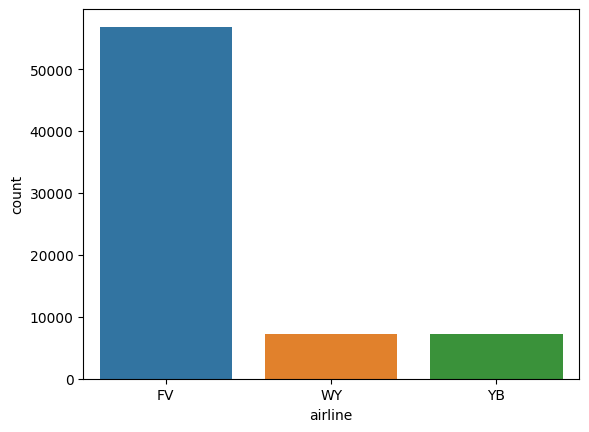

In [23]:
_ = sns.countplot(x=dados['airline'])

In [24]:
dados['aircraft_type'].value_counts()

aircraft_type
Airbus A320     28608
Boeing 737      26104
Boeing 787       9387
Embraer E175     7076
Name: count, dtype: int64

c:\Users\Igor\Documents\GitHub\data_flight_delays\.venv\Lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<Axes: xlabel='aircraft_type', ylabel='count'>

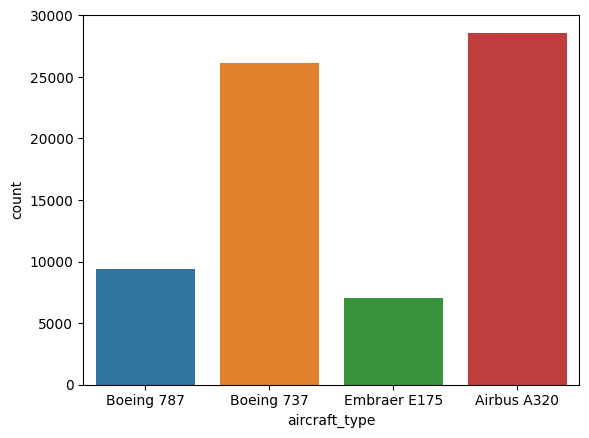

In [25]:
sns.countplot(dados['aircraft_type'])

In [26]:
dados['origin'].value_counts()

origin
ZME    18899
CBT    14241
KXL     9585
WMW     9509
ZNE     7077
PHP     7038
SZB     4826
Name: count, dtype: int64

c:\Users\Igor\Documents\GitHub\data_flight_delays\.venv\Lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<Axes: xlabel='origin', ylabel='count'>

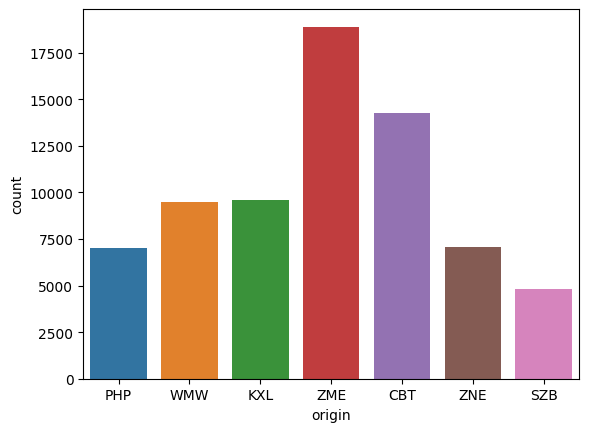

In [27]:
sns.countplot(dados['origin'])

In [28]:
dados['schengen'].value_counts(normalize= True)

schengen
schengen        0.866526
non-schengen    0.133474
Name: proportion, dtype: float64

c:\Users\Igor\Documents\GitHub\data_flight_delays\.venv\Lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<Axes: xlabel='schengen', ylabel='count'>

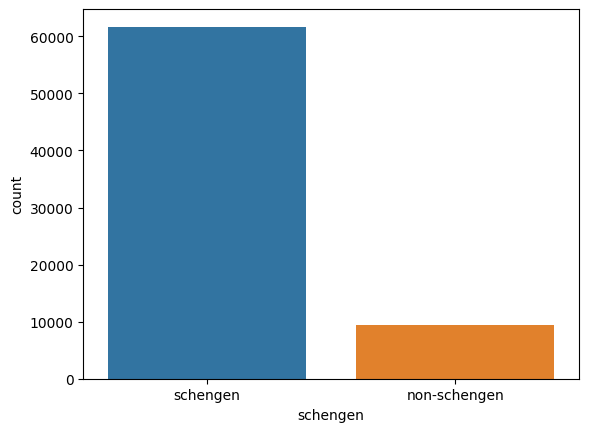

In [29]:
sns.countplot(dados['schengen'])

OptionError: No such keys(s): 'mode.use_inf_as_null'

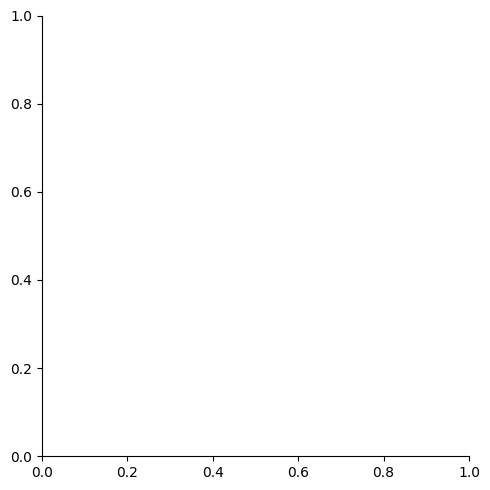

In [30]:
sns.displot(dados['delay'])

In [ ]:
sns.displot(dados['arrival_time'])

In [ ]:
sns.displot(dados['departure_time'])

In [ ]:
sns.boxplot(dados['delay'])

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

In [ ]:
categorical_vars = ['airline', 'aircraft_type', 'origin']

# Perform one-hot encoding
df_encoded_4 = pd.get_dummies(dados, columns=categorical_vars, dtype=int)

df_encoded_4['is_holiday'] = df_encoded_4['is_holiday'].map({False: 0, True: 1})
df_encoded_4['schengen'] = df_encoded_4['schengen'].map({'non-schengen': 0, 'schengen': 1})
df_encoded_4['is_weekend'] = df_encoded_4['day'].apply(lambda day: day % 7 == 0 or day % 7 == 6)

X = df_encoded_4.drop(['flight_id', 'day', 'year','departure_time', 'delay', 'date'], axis=1)
y = df_encoded_4['delay']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # random_state=42

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline

model = RandomForestRegressor()
rfe = RFE(model)
pipeline = Pipeline(steps=[('s',rfe),('m',model)])
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)

mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

rmse = mean_squared_error(y_test, y_pred, squared=False)
print('Root Mean Squared Error:', rmse)

r2 = r2_score(y_test, y_pred)
print('R-squared:', r2)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)

mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

rmse = mean_squared_error(y_test, y_pred, squared=False)
print('Root Mean Squared Error:', rmse)

r2 = r2_score(y_test, y_pred)
print('R-squared:', r2)

In [ ]:
model_boosting = GradientBoostingRegressor()
model_boosting.fit(X_train, y_train)

y_pred = model_boosting.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)

mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

rmse = mean_squared_error(y_test, y_pred, squared=False)
print('Root Mean Squared Error:', rmse)

r2 = r2_score(y_test, y_pred)
print('R-squared:', r2)

In [ ]:
!python -m pip install statsmodels

In [ ]:
px.scatter(x = y_test, y = y_pred, trendline = 'ols', trendline_color_override = 'red',opacity = 0.2)

In [ ]:
px.scatter(x = y_pred, y = (y_pred - y_test), trendline = 'ols', trendline_color_override = 'red',opacity = 0.2)

In [ ]:
import seaborn as sns

In [ ]:
from scipy.stats import skewnorm
import numpy as np

In [ ]:
a = 5

In [ ]:
r = skewnorm.rvs(a, size=1000)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
fig, ax = plt.subplots(1, 1)
x = np.linspace(skewnorm.ppf(0.01, a),
                skewnorm.ppf(0.99, a), 100)
ax.plot(x, skewnorm.pdf(x, a),
       'r-', lw=5, alpha=0.6, label='skewnorm pdf')
ax.hist(r, density=True, bins='auto', histtype='stepfilled', alpha=0.2)
ax.set_xlim([x[0], x[-1]])
ax.legend(loc='best', frameon=False)
plt.show()